In [69]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

In [75]:
pdf = pd.read_csv('advertising/advertising.csv')

In [76]:
pdf.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


## 特徴量作成

In [77]:
len(pdf['Ad Topic Line'].unique())

1000

In [78]:
len(pdf['City'].unique())

969

In [79]:
len(pdf['Country'].unique())

237

In [80]:
#DUMMY_COLS = ['Ad Topic Line', 'City', 'Country']
EXCLUDE_COLS = ['Timestamp', 'Ad Topic Line', 'City', 'Country']
TARGET_COL = 'Clicked on Ad'
USE_COLS1 = list(set(pdf.columns) - set(DUMMY_COLS) - set(EXCLUDE_COLS) - set([TARGET_COL]))
USE_COLS2 = list(set(pdf.columns) - set(DUMMY_COLS) - set(EXCLUDE_COLS))

In [81]:
USE_COLS1

['Male',
 'Age',
 'Daily Time Spent on Site',
 'Area Income',
 'Daily Internet Usage']

In [82]:
#df_dummy = pd.get_dummies(pdf[DUMMY_COLS])

In [83]:
pdf_cluster1 = pdf[USE_COLS]
pdf_cluster2 = pdf[USE_COLS2]

In [84]:
pdf_cluster1.head()

,Male,Age,Daily Time Spent on Site,Area Income,Daily Internet Usage
0,0,35,68.95,61833.90,256.09
1,1,31,80.23,68441.85,193.77
2,0,26,69.47,59785.94,236.50
3,1,29,74.15,54806.18,245.89
4,0,35,68.37,73889.99,225.58


## クラスター分析

### 目的変数含

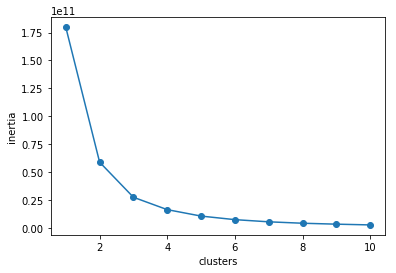

In [85]:
# エルボーカーブ

inertia = []

for i in range(1, 11):
    clf = KMeans(n_clusters=i,
                init='k-means++',
                n_init=10,
                max_iter=300,
                random_state=0)
    clf.fit(pdf_cluster2)
    inertia.append(clf.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('clusters')
plt.ylabel('inertia')
plt.show()

In [86]:
clf = KMeans(n_clusters=5,
            init='k-means++',
            n_init=10,
            max_iter=300,
            random_state=0)
clf.fit(pdf_cluster2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [87]:
pdf_cluster2['cluster'] = clf.labels_

c:\users\user\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [88]:
pdf_cluster2.head()

,Male,Area Income,Daily Internet Usage,Age,Daily Time Spent on Site,Clicked on Ad,cluster
0,0,61833.90,256.09,35,68.95,0,4
1,1,68441.85,193.77,31,80.23,0,1
2,0,59785.94,236.50,26,69.47,0,4
3,1,54806.18,245.89,29,74.15,0,0
4,0,73889.99,225.58,35,68.37,0,1


In [89]:
cluster_mean = pdf_cluster2.groupby('cluster').agg('mean').sort_values('Clicked on Ad')

In [90]:
cluster_mean

,Male,Area Income,Daily Internet Usage,Age,Daily Time Spent on Site,Clicked on Ad
cluster,,,,,,
1,0.404762,70122.228770,194.718333,35.531746,68.972698,0.269841
4,0.536332,60567.149827,191.459066,33.923875,70.001073,0.342561
0,0.524793,50771.658264,175.531074,35.851240,62.979628,0.570248
3,0.496296,39786.805111,150.983259,38.629630,56.105852,0.837037
2,0.365854,26430.879756,155.343293,40.975610,55.773293,1.000000


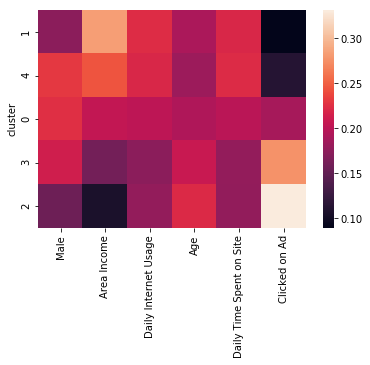

In [91]:
sns.heatmap(cluster_mean.apply(lambda x: x/sum(x)))

In [92]:
cluster_mean.corr()

,Male,Area Income,Daily Internet Usage,Age,Daily Time Spent on Site,Clicked on Ad
Male,1.000000,0.308215,0.199755,-0.637344,0.310216,-0.341487
Area Income,0.308215,1.000000,0.926700,-0.902034,0.933342,-0.988313
Daily Internet Usage,0.199755,0.926700,1.000000,-0.877923,0.988761,-0.965548
Age,-0.637344,-0.902034,-0.877923,1.000000,-0.924061,0.936812
Daily Time Spent on Site,0.310216,0.933342,0.988761,-0.924061,1.000000,-0.975789
Clicked on Ad,-0.341487,-0.988313,-0.965548,0.936812,-0.975789,1.000000


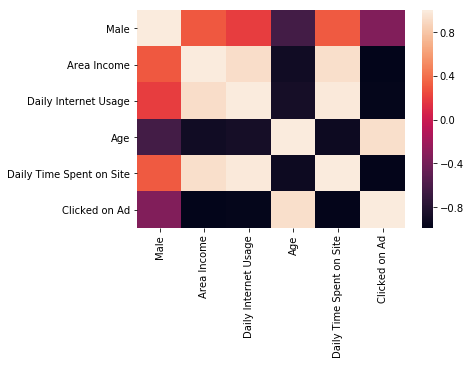

In [93]:
sns.heatmap(cluster_mean.corr())